In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor'] = 'm'

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.
In this notebook, you will load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


In [4]:
price=cad_jpy_df['Price']
price.head()

Date
1990-01-02    126.37
1990-01-03    125.30
1990-01-04    123.46
1990-01-05    124.54
1990-01-08    124.27
Name: Price, dtype: float64

# Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

In [5]:
# Plot just the "Price" column from the dataframe:
# YOUR CODE HERE!

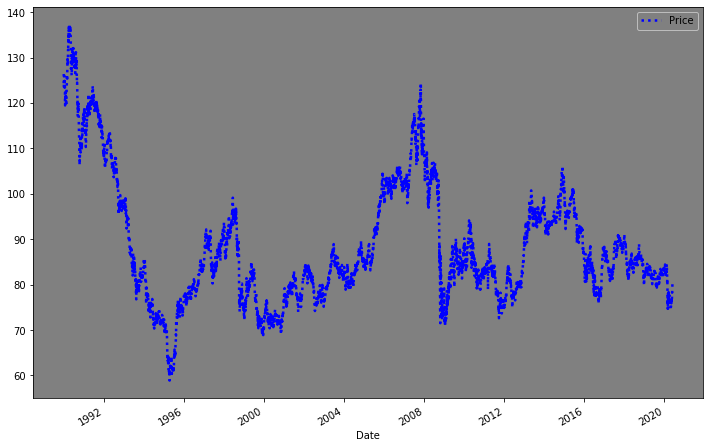

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'grey'
fig = cad_jpy_df['Price'].plot(figsize=(12,8),y="Price",ls = ':', color = 'blue',linewidth = '2.5',legend="Price" )

**Question:** Do you see any patterns, long-term and/or short? 

**Answer:** YOUR ANSWER HERE

In short term, the pricing patterns shown more fluctuations thus indicating more volatility whereas in the long term  the pricing patterns shown more consistent trends in terms of rises/falls.The prices of yen had fallen consisitently from 1980 to 1996 with few upbeats hitting as low as $58 from $138 in 1991 , from 1996 to 1999, the prices had recovered before it started falling again. From 2003, the pricing were taking upbeat trends in the long run with small regular cycles of volatility before it hit GFC in 2008 where it had shown a steep fall with one small cycle of recovery before it hits the one of lowest level in 2009. It had shown lots of small volatitlity cycles in the short run before it started surging upward steeply, Between 2014 to 2016, it appeared to show small volatility with rises and falls before it started falling back. In 2017, the price had appeared to set a new low limit of $79.It seems that the price was hovering between $90 as upper limit to $79 as a lower limit from 2017 to 2020. The prices had become less volatile lately as compared to  1990 to 1996.



---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the exchange rate price into trend and noise.

In [7]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
# YOUR CODE HERE!

In [8]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!

In [9]:
def get_noise_trend(data):
    import statsmodels.api as sm
    df_noise, df_trend = sm.tsa.filters.hpfilter(data)
    #data = data.to_frame()
    data["noise"] = df_noise
    data["trend"] = df_trend
    return data

In [10]:
from get_noise_trend import get_noise_trend

In [11]:
pd.read_csv("cad_jpy.csv")

,Date,Price,Open,High,Low
0,5-Jan-82,184.65,184.65,184.65,184.65
1,6-Jan-82,185.06,185.06,185.06,185.06
2,7-Jan-82,186.88,186.88,186.88,186.88
3,8-Jan-82,186.58,186.58,186.58,186.58
4,11-Jan-82,187.64,187.64,187.64,187.64
...,...,...,...,...,...
9961,29-May-20,78.29,78.21,78.41,77.75
9962,1-Jun-20,79.27,78.21,79.36,78.04
9963,2-Jun-20,80.40,79.26,80.56,79.15
9964,3-Jun-20,80.70,80.40,80.82,79.96


In [12]:
#get_noise_trend(price["Price"])
#get_noise_trend(price)

In [13]:
#price = price.to_frame()

In [14]:
new_df= get_noise_trend(price)
filtered_df= new_df.loc["2015-01-01":, :]
filtered_df.head()

,Price,noise,trend
Date,,,
2015-01-01,103.12,1.523927,101.596073
2015-01-02,102.25,0.945717,101.304283
2015-01-05,101.70,0.708200,100.991800
2015-01-06,100.04,-0.620865,100.660865
2015-01-07,100.93,0.615839,100.314161


In [15]:
#price = price.to_frame()

In [16]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!

In [17]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!
#fig=new_df.plot()


In [18]:
#get_noise_trend(price["Price"]).plot()
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!#filtered_df['trend'].plot()

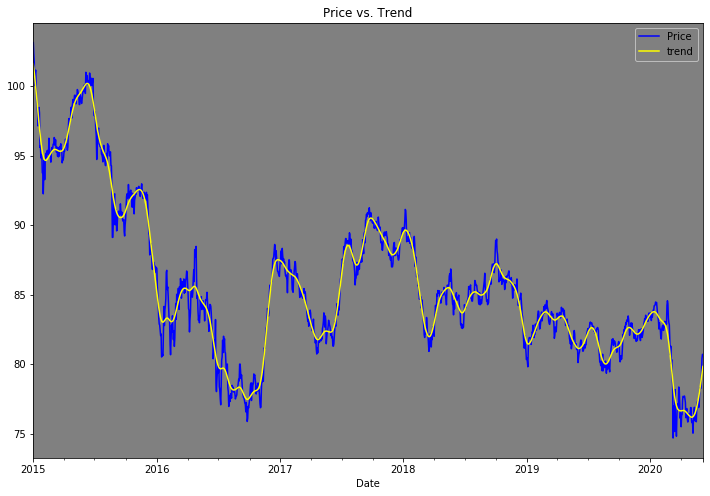

In [19]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!

#gca stands for 'get current axis'
ax = plt.gca();

filtered_df.plot(figsize=(12,8),kind='line',y='Price',color='blue',ax=ax);
filtered_df.plot(figsize=(12,8), kind='line',y='trend',title='Price vs. Trend', color='yellow', ax=ax);
#filtered_df.plot();
#plt.show()

**Question:** Do you see any patterns, long-term and/or short?

**Answer:** YOUR ANSWER HERE

Over the selected period in long term , the price graph movement is overlapped by the trend graph movement.In other words, the trend and price appears to be correlated. It means that the prices movements of Yen were driven by the trends and vice versa.Similarly the price movements of Yen was directly related to trends.Basically the trends indicates the directions of the price movements in the long run.
The prices patterns shows more volatility as compared to trend in the short run. The price graphs shows more curvy lines as compared to trends which were less curvy as compared to price lines


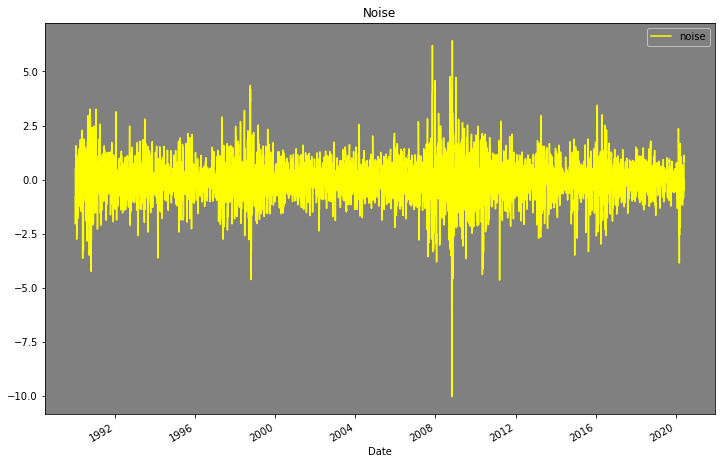

In [20]:
# Plot the Settle Noise
# YOUR CODE HERE!
data=get_noise_trend(price)
data.plot(figsize=(12,8), color='yellow',title='Noise', y='noise')

---

# Forecasting Returns using an ARMA Model

Using exchange rate *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [21]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [22]:
import statsmodels.api as sm

In [23]:
# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!

from statsmodels.tsa.arima_model import ARMA

In [24]:
# Fit the model and assign it to a variable called results
# YOUR CODE HERE!

model=ARMA(returns.values, order=(2,1))
result=model.fit()

In [25]:

# Output model summary results:
# YOUR CODE HERE!
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                     ARMA(2, 1)   Log Likelihood               -9751.978
Method:                       css-mle   S.D. of innovations              0.828
Date:                Sun, 25 Jul 2021   AIC                          19513.955
Time:                        17:09:21   BIC                          19548.846
Sample:                             0   HQIC                         19525.903
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.009     -0.245      0.807      -0.020       0.016
ar.L1.y       -0.8547      0.164     -5.200      0.000      -1.177      -0.533
ar.L2.y       -0.0197      0.013     -1.475      0.140      -0.046       0.006
ma.L1.y        0.8246      0.164      5.030      0.000       0.503       1.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2033           +0.0000j            1.2033            0.5000
AR.2          -42.1701           +0.0000j           42.1701            0.5000
MA.1           -1.2127           +0.0000j            1.2127            0.5000
-----------------------------------------------------------------------------
"""

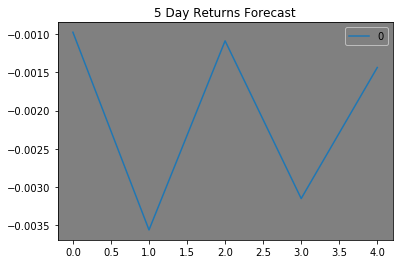

In [26]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!

pd.DataFrame(result.forecast(steps=5)[0]).plot(title="5 Day Returns Forecast")

**Question:** Based on the p-value, is the model a good fit?

**Answer:** YOUR ANSWER HERE

---The P>|z| column is the p-value of the coefficient. It is really important to check these p-values before you continue using the model. If any of these values are higher than your given threshold (usually 0.05), you might be using an unreliable coefficient that might cause misleading results. In our case,  p-values for ar.L2.y	is 0.14 which is higher than 0.05, so this model might give misleading results. Henceforth, the model is not a good fit.

# Forecasting the Exchange Rate Price using an ARIMA Model

 1. Using the *raw* CAD/JPY exchange rate price, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Plot a 5 day forecast for the Exchange Rate Price. What does the model forecast predict will happen to the Japanese Yen in the near term?

In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!

model=ARIMA(cad_jpy_df['Price'], order=(5,1,1))  

C:\Users\nd321\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nd321\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [29]:
# Output model summary results:
# YOUR CODE HERE!

results=model.fit()


In [30]:
# Output model summary results:
# YOUR CODE HERE!
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.622
Method:                       css-mle   S.D. of innovations              0.729
Date:                Sun, 25 Jul 2021   AIC                          17507.244
Time:                        17:09:23   BIC                          17563.070
Sample:                             1   HQIC                         17526.361
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0058      0.008     -0.743      0.458      -0.021       0.009
ar.L1.D.Price     0.4287      0.246      1.740      0.082      -0.054       0.912
ar.L2.D.Price     0.0177      0.014      1.264      0.206      -0.010       0.045
ar.L3.D.Price    -0.0118      0.012     -0.959      0.337      -0.036       0.012
ar.L4.D.Price     0.0110      0.012      0.879      0.379      -0.013       0.035
ar.L5.D.Price    -0.0191      0.011     -1.702      0.089      -0.041       0.003
ma.L1.D.Price    -0.4568      0.246     -1.856      0.064      -0.939       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7660           -0.7702j            1.9266           -0.0655
AR.2            1.7660           +0.7702j            1.9266            0.0655
AR.3           -2.3649           -0.0000j            2.3649           -0.5000
AR.4           -0.2974           -2.4212j            2.4394           -0.2695
AR.5           -0.2974           +2.4212j            2.4394            0.2695
MA.1            2.1893           +0.0000j            2.1893            0.0000
-----------------------------------------------------------------------------
"""

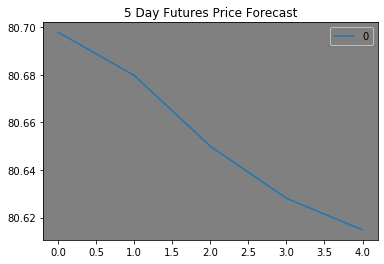

In [31]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="5 Day Futures Price Forecast")


The p-value is greater than the significance level,we cannot conclude that the coefficient is statistically significant. we may want to refit the model without the term.



**Question:** What does the model forecast will happen to the Japanese Yen in the near term?

**Answer:** As per the model forecast, Japanese Yen will continue to fall in the near term.

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen exchange rate returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using exchange rate *Returns*, estimate a GARCH model. **Hint:** You can reuse the `returns` variable from the ARMA model section.

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [32]:
!pip install arch
from arch import arch_model

In [33]:
# Estimate a GARCH model:
# YOUR CODE HERE!
model=arch_model(returns, mean="Zero", vol= "GARCH", p=2, q=1)  

In [34]:
# Fit the model
# YOUR CODE HERE!
res=model.fit(disp="on") 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 46548.40924082976
Iteration:      2,   Func. Count:     16,   Neg. LLF: 569545243.4284524
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8928.838552966728
Iteration:      4,   Func. Count:     27,   Neg. LLF: 11769.086094978014
Iteration:      5,   Func. Count:     33,   Neg. LLF: 10426.350185312931
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8916.366479560163
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8911.111921464748
Iteration:      8,   Func. Count:     52,   Neg. LLF: 8911.027336222945
Iteration:      9,   Func. Count:     57,   Neg. LLF: 8911.02203125968
Iteration:     10,   Func. Count:     62,   Neg. LLF: 8911.021014202204
Iteration:     11,   Func. Count:     67,   Neg. LLF: 8911.020776838068
Iteration:     12,   Func. Count:     72,   Neg. LLF: 8911.020764888566
Iteration:     13,   Func. Count:     76,   Neg. LLF: 8911.02076489123


In [35]:
# Summarize the model results
# YOUR CODE HERE!
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Sun, Jul 25 2021   Df Residuals:                     7928
Time:                        17:09:27   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

**Note:** Our p-values for GARCH and volatility forecasts tend to be much lower than our ARMA/ARIMA return and price forecasts. In particular, here we have all p-values of less than 0.05, except for alpha(2), indicating overall a much better model performance. In practice, in financial markets, it's easier to forecast volatility than it is to forecast returns or prices. (After all, if we could very easily predict returns, we'd all be rich!)

In [36]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [37]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
# YOUR CODE HERE!
#pd.DataFrame(last_day.forecast(steps=5)[0])
forecasts = res.forecast(horizon=5) #reindex=False)
print(forecasts.residual_variance.iloc[-1:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2020-06-04  0.626608  0.627375  0.628132  0.628879  0.629616


In [38]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566035,12.573725,12.581308,12.588786,12.596161


In [39]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566035
h.2,12.573725
h.3,12.581308
h.4,12.588786
h.5,12.596161


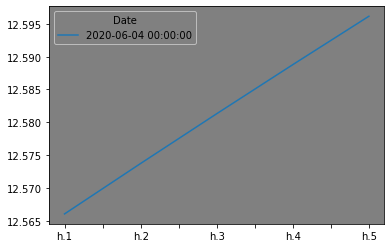

In [40]:
# Plot the final forecast
# YOUR CODE HERE!
final.plot()

**Question:** What does the model forecast will happen to volatility in the near term?

**Answer:**The model reflects the steep upward line in the near term. It appears to regain the pricing but it doesnot show any volatility in the price rise.

---

# Conclusions

1. Based on your time series analysis, would you buy the yen now?

    * As the market is predicted to go up, I would prefer to buy and hold Yen for now. Once it is close to peak, I would sell then.
    

2. Is the risk of the yen expected to increase or decrease?
    * As per the model predicitions, the price of the yen is expected to increase, Since the price increase movements doesnot show any volitality. The continous increase in price movements without volatility reduces the risk levels

3. Based on the model evaluation, would you feel confident in using these models for trading?
    * As ARMA, ARIMA and GARCH build models on different criteria, it allows to capture various parameters for forecasting,it gives confidence to be used as models for trading. In saying so, it still depends on the quality of the historical data and the selection of the lagging period to get goof forecasting results.
